In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SpecFunctions import *
from HamiltonianFunctions import *
# from HamiltonianFunctions import *
# from PointChargeFunctions import *

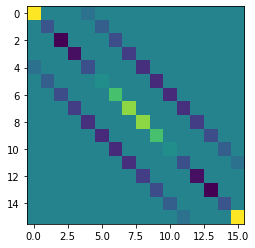

In [4]:
test = StevensOperators(15/2)
bdict_test = {'B2':[0,0,0],'B4':[1.0,0,0,0,-5],'B6':[0,0,0,0,0,0,0]}
plt.figure()
plt.imshow(test.build_ham(bdict_test))
plt.show()

In [4]:
def GenOperators(Jval):
    J2 = Jval*(Jval+1)*np.eye(int(2*Jval+1))
    Jz = np.diag(np.arange(-1*Jval,Jval+1))
    Jp = np.diag(np.sqrt(Jval*(Jval+1)-np.arange(-1*Jval,Jval+1)[0:-1]*np.arange(-1*Jval,Jval+1)[1:]),k=1)
    Jm = np.diag(np.sqrt(Jval*(Jval+1)-np.arange(-1*Jval,Jval+1)[0:-1]*np.arange(-1*Jval,Jval+1)[1:]),k=-1)
    
    O40 = 35*np.linalg.matrix_power(Jz,4) - (30*Jval*(Jval+1) -25)*np.linalg.matrix_power(Jz,2) - 6*J2 + 3*J2@J2
    O44 = 0.5*(np.linalg.matrix_power(Jp,4)  + np.linalg.matrix_power(Jm,4))
    
    O60 = (231*np.linalg.matrix_power(Jz,6) - 105*3*J2@np.linalg.matrix_power(Jz,4) + 105*7*np.linalg.matrix_power(Jz,4) +
       105*J2@J2@Jz@Jz - 525*J2@Jz@Jz + 294*Jz@Jz - 5*J2@J2@J2 + 40*J2@J2 - 60*J2)

    O64 = 0.25*(11*Jz@Jz - J2 - 38*np.eye(int(2*Jval+1)))@(Jp@Jp@Jp@Jp + Jm@Jm@Jm@Jm) + 0.25*(Jp@Jp@Jp@Jp + Jm@Jm@Jm@Jm)@(11*Jz@Jz - J2 - 38*np.eye(int(2*Jval+1)))

    O4 = O40 + 5*O44
    O6 = O60 - 21*O64

    F4 = 60.
    if Jval==15/2:
        F6 = 13860.
    else:
        F6=4*2160.
    return O4/F4, O6/F6

def GenOperators2(Jval):
    ops = StevensOperators(Jval)
    O40 = ops.o_mat(4,0)
    O44 = ops.o_mat(4,4)
    
    O60 = ops.o_mat(6,0)
    O64 = ops.o_mat(6,4)
    
    O4 = O40 + 5*O44
    O6 = O60 - 21*O64

    F4 = 60.
    if Jval==15/2:
        F6 = 13860.
    else:
        F6=4*2160.
    return O4/F4, O6/F6

def CalcEigVals(xval,O4,O6):
    Ham = xval*O4 + (1-np.abs(xval))*O6
    return np.linalg.eigh(Ham)

<IPython.core.display.Javascript object>


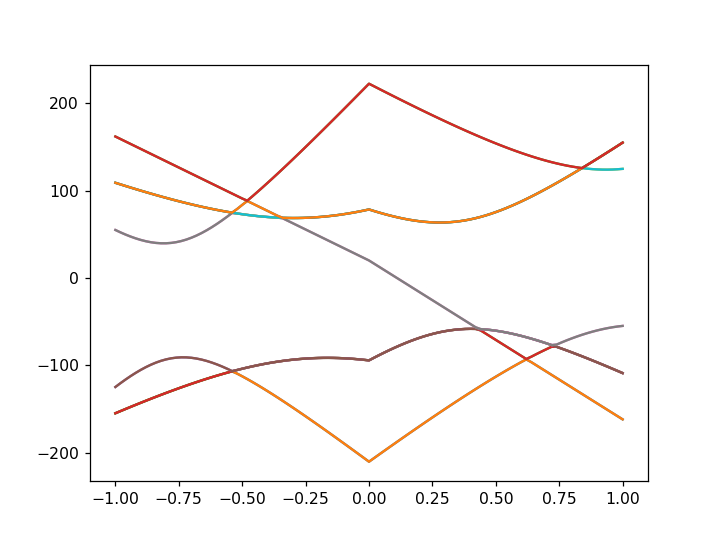

In [6]:
xvec = np.linspace(-1,1,101)

GSO4, GSO6 = GenOperators2(15/2)
ESO4, ESO6 = GenOperators2(13/2)

GSoutdata = [CalcEigVals(xval,GSO4,GSO6) for xval in xvec]

GSeigvals = np.asarray([dat[0] for dat in GSoutdata])
GSeigvecs = np.asarray([dat[1] for dat in GSoutdata])

ESoutdata = [CalcEigVals(xval,ESO4,ESO6) for xval in xvec]

ESeigvals = np.asarray([dat[0] for dat in ESoutdata])
ESeigvecs = np.asarray([dat[1] for dat in ESoutdata])

%matplotlib notebook

plt.figure()
[plt.plot(xvec,pltvec) for pltvec in ESeigvals.T]
plt.show()

<IPython.core.display.Javascript object>


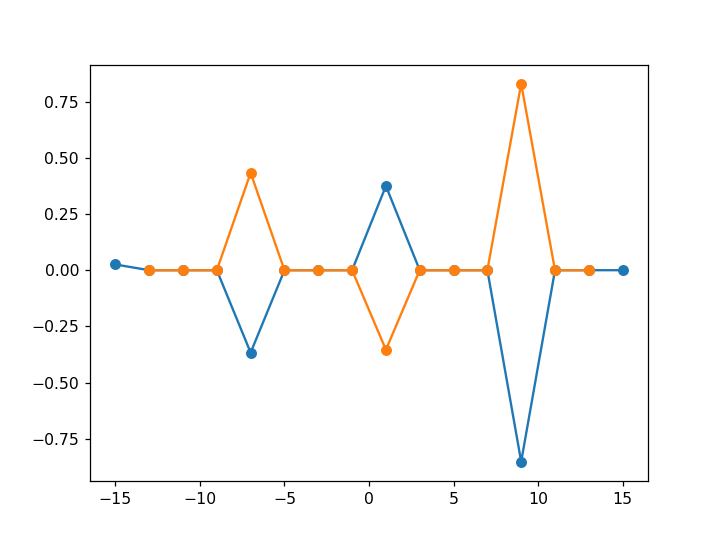

In [8]:
GSO4, GSO6 = GenOperators(15/2)

ESO4, ESO6 = GenOperators(13/2)

GSout = CalcEigVals(1.0,GSO4,GSO6)

GSmjvec = 2*np.arange(-15/2,16/2)

ESmjvec = 2*np.arange(-13/2,14/2)

ESout = CalcEigVals(1.0,ESO4,ESO6)

plt.figure()
plt.plot(GSmjvec,GSout[1][:,0],'-o')
plt.plot(ESmjvec,ESout[1][:,0],'-o')
plt.show()

<IPython.core.display.Javascript object>


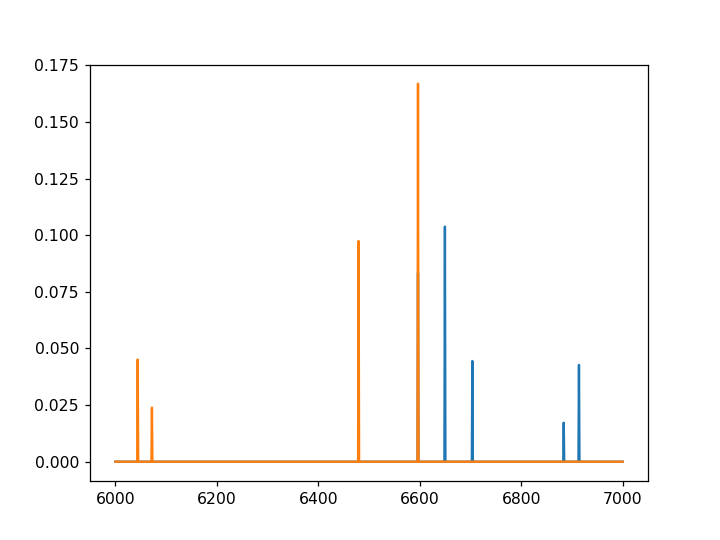

In [9]:
gs_calc_dict = {'eigenvalues':GSout[0],'eigenvecs':GSout[1],'Jval':15/2}
es_calc_dict = {'eigenvalues':ESout[0],'eigenvecs':ESout[1],'Jval':13/2}

a_exc,b_exc = calc_spectrum(gs_calc_dict,es_calc_dict,Spectrum='Excitation',Temperature=1.0)
a_em,b_em = calc_spectrum(gs_calc_dict,es_calc_dict,Spectrum='Emission',Temperature=1.0)

plt.figure()
plt.plot(a_exc,b_exc)
plt.plot(a_em,b_em)
plt.show()